## 1. Load relevent libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 2. Data Loading

In [2]:
DATA_DIR = './'
DATA = 'cleaned_train.csv'

In [3]:
df = pd.read_csv(os.path.join(DATA_DIR, DATA))
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


## 3. Cleaning Process I

### - 중복 컬럼 제거

In [4]:
drop_cols = ['Name', 'SSN']
cleaned_df = df.drop(drop_cols, axis=1)

### - 대출 상품 리스트 분리

In [5]:
cleaned_df['Type_of_Loan'][9]

'Credit-Builder Loan'

In [6]:
cleaned_df['Type_of_Loan'].str.split(',')

0        [Auto Loan,  Credit-Builder Loan,  Personal Lo...
1        [Auto Loan,  Credit-Builder Loan,  Personal Lo...
2        [Auto Loan,  Credit-Builder Loan,  Personal Lo...
3        [Auto Loan,  Credit-Builder Loan,  Personal Lo...
4        [Auto Loan,  Credit-Builder Loan,  Personal Lo...
                               ...                        
99995                       [Auto Loan,  and Student Loan]
99996                       [Auto Loan,  and Student Loan]
99997                       [Auto Loan,  and Student Loan]
99998                       [Auto Loan,  and Student Loan]
99999                       [Auto Loan,  and Student Loan]
Name: Type_of_Loan, Length: 100000, dtype: object

In [7]:
import re

In [8]:
search = ' and '
space = ' '

In [9]:
def search_and_remove(li, search_word):

    for i, word in enumerate(li):
        if search_word in word:
            li[i] = re.sub(search_word, '', word)
            # li[i] = re.sub(space, '', word)
        # else:
            # li[i] = re.sub(space, '', word)
    return li

def white_space_remover(li, ws):

    for i, word in enumerate(li):
        if ws in word:
            li[i] = re.sub(ws, '', word)
    return li

In [10]:
search_and_remove(['Auto Loan',  'Credit-Builder Loan',  'Personal Loan',  ' and Home Equity Loan'], search)

['Auto Loan', 'Credit-Builder Loan', 'Personal Loan', 'Home Equity Loan']

In [11]:
cleaned_df['Type_of_Loan'] = cleaned_df['Type_of_Loan'].str.split(',').apply(lambda x :  search_and_remove(x, search))
cleaned_df['Type_of_Loan'] = cleaned_df['Type_of_Loan'].apply(lambda x :  white_space_remover(x, space))

In [12]:
cleaned_df['Type_of_Loan']

0        [AutoLoan, Credit-BuilderLoan, PersonalLoan, H...
1        [AutoLoan, Credit-BuilderLoan, PersonalLoan, H...
2        [AutoLoan, Credit-BuilderLoan, PersonalLoan, H...
3        [AutoLoan, Credit-BuilderLoan, PersonalLoan, H...
4        [AutoLoan, Credit-BuilderLoan, PersonalLoan, H...
                               ...                        
99995                              [AutoLoan, StudentLoan]
99996                              [AutoLoan, StudentLoan]
99997                              [AutoLoan, StudentLoan]
99998                              [AutoLoan, StudentLoan]
99999                              [AutoLoan, StudentLoan]
Name: Type_of_Loan, Length: 100000, dtype: object

In [13]:
cleaned_df['Type_of_Loan'][0]

['AutoLoan', 'Credit-BuilderLoan', 'PersonalLoan', 'HomeEquityLoan']

In [14]:
type_of_loans = cleaned_df['Type_of_Loan']

In [15]:
pd.get_dummies(type_of_loans.apply(pd.Series).stack()).sum(axis=1)

0      0    1
       1    1
       2    1
       3    1
1      0    1
           ..
99997  1    1
99998  0    1
       1    1
99999  0    1
       1    1
Length: 364696, dtype: int64

In [16]:
# OHE for Loan Types
loan_dummy_df = pd.get_dummies(type_of_loans.apply(pd.Series).stack()).sum(level=0)
loan_dummy_df

/var/folders/rm/1g600byx25b_ht2r9ty6b4_00000gn/T/ipykernel_25802/4009385760.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  loan_dummy_df = pd.get_dummies(type_of_loans.apply(pd.Series).stack()).sum(level=0)


,AutoLoan,Credit-BuilderLoan,DebtConsolidationLoan,HomeEquityLoan,MortgageLoan,NoData,NotSpecified,PaydayLoan,PersonalLoan,StudentLoan
0,1,1,0,1,0,0,0,0,1,0
1,1,1,0,1,0,0,0,0,1,0
2,1,1,0,1,0,0,0,0,1,0
3,1,1,0,1,0,0,0,0,1,0
4,1,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
99995,1,0,0,0,0,0,0,0,0,1
99996,1,0,0,0,0,0,0,0,0,1
99997,1,0,0,0,0,0,0,0,0,1
99998,1,0,0,0,0,0,0,0,0,1


In [17]:
# OHE 연결
cleaned_df = pd.concat([cleaned_df, loan_dummy_df], axis=1)
cleaned_df

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,AutoLoan,Credit-BuilderLoan,DebtConsolidationLoan,HomeEquityLoan,MortgageLoan,NoData,NotSpecified,PaydayLoan,PersonalLoan,StudentLoan
0,5634,3392,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,1,1,0,1,0,0,0,0,1,0
1,5635,3392,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,1,1,0,1,0,0,0,0,1,0
2,5636,3392,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,1,1,0,1,0,0,0,0,1,0
3,5637,3392,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,1,1,0,1,0,0,0,0,1,0
4,5638,3392,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,1,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,1,0,0,0,0,0,0,0,0,1
99996,155626,37932,5,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,1,0,0,0,0,0,0,0,0,1
99997,155627,37932,6,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,1,0,0,0,0,0,0,0,0,1
99998,155628,37932,7,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,1,0,0,0,0,0,0,0,0,1


In [18]:
# cleaned_df = pd.concat([cleaned_df, loan_dummy_df], axis=1)
cols = cleaned_df.columns.tolist()
y_index = cols.index('Credit_Score')
new_cols = cols[:y_index] + cols[y_index + 1: ] + cols[y_index].split()
new_cols

['ID',
 'Customer_ID',
 'Month',
 'Age',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'AutoLoan',
 'Credit-BuilderLoan',
 'DebtConsolidationLoan',
 'HomeEquityLoan',
 'MortgageLoan',
 'NoData',
 'NotSpecified',
 'PaydayLoan',
 'PersonalLoan',
 'StudentLoan',
 'Credit_Score']

In [19]:
cleaned_df = cleaned_df[new_cols]
cleaned_df

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit-BuilderLoan,DebtConsolidationLoan,HomeEquityLoan,MortgageLoan,NoData,NotSpecified,PaydayLoan,PersonalLoan,StudentLoan,Credit_Score
0,5634,3392,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,1,0,1,0,0,0,0,1,0,Good
1,5635,3392,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,1,0,1,0,0,0,0,1,0,Good
2,5636,3392,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,1,0,1,0,0,0,0,1,0,Good
3,5637,3392,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,1,0,1,0,0,0,0,1,0,Good
4,5638,3392,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,1,0,1,0,0,0,0,1,0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,0,0,0,0,0,0,0,0,1,Poor
99996,155626,37932,5,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,0,0,0,0,0,0,0,0,1,Poor
99997,155627,37932,6,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,0,0,0,0,0,0,0,0,1,Poor
99998,155628,37932,7,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,0,0,0,0,0,0,0,0,1,Standard


## 4. EDA

### 1) Customer View Point

In [20]:
# 총 고객 수
cleaned_df['Customer_ID'].nunique()

12500

In [21]:
cleaned_df.groupby('Customer_ID', group_keys=True)['Credit_Score'].apply(lambda x : x[:10])

/var/folders/rm/1g600byx25b_ht2r9ty6b4_00000gn/T/ipykernel_25802/2544113446.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  cleaned_df.groupby('Customer_ID', group_keys=True)['Credit_Score'].apply(lambda x : x[:10])


Customer_ID       
1006         14744    Poor
             14745    Poor
             14746    Poor
             14747    Poor
             14748    Poor
                      ... 
50999        54219    Good
             54220    Good
             54221    Good
             54222    Good
             54223    Good
Name: Credit_Score, Length: 100000, dtype: object

### 2) Label Dictionary of Credit Score

In [22]:
np.unique(cleaned_df['Credit_Score'])

array(['Good', 'Poor', 'Standard'], dtype=object)

Good > Standard > Poor 순으로 정렬 필요.

In [23]:
# label2idx 딕셔너리 생성
label2idx = {'Poor': 0, 'Standard': 1, 'Good': 2}

# cleaned_df['Credit_Score'].map(label2idx)
cleaned_df['Credit_Score'] = cleaned_df['Credit_Score'].map(label2idx)
cleaned_df['Credit_Score']

0        2
1        2
2        2
3        2
4        2
        ..
99995    0
99996    0
99997    0
99998    1
99999    0
Name: Credit_Score, Length: 100000, dtype: int64

In [24]:
# idx to label dictionary
idx2label = {}
for idx, value in label2idx.items():
    idx2label[value] = idx

idx2label

{0: 'Poor', 1: 'Standard', 2: 'Good'}

## 5. 데이터 전처리

### 1) Age 구간화

In [25]:
cleaned_df['Age'].describe()

count    100000.000000
mean         33.316340
std          10.764812
min          14.000000
25%          24.000000
50%          33.000000
75%          42.000000
max          56.000000
Name: Age, dtype: float64

In [26]:
age_range = [10, 20, 30, 40, 50, 60]
age_labels = [10, 20, 30, 40, 50]
age_bins = pd.cut(cleaned_df['Age'], bins=age_range, labels=age_labels)
age_bins.describe()

count     100000
unique         5
top           30
freq       28968
Name: Age, dtype: int64

In [27]:
age_bins

0        20
1        20
2        20
3        20
4        20
         ..
99995    20
99996    20
99997    20
99998    20
99999    20
Name: Age, Length: 100000, dtype: category
Categories (5, int64): [10 < 20 < 30 < 40 < 50]

(array([14003.,     0., 28793.,     0.,     0., 28968.,     0., 21006.,
            0.,  7230.]),
 array([10., 14., 18., 22., 26., 30., 34., 38., 42., 46., 50.]),
 <BarContainer object of 10 artists>)

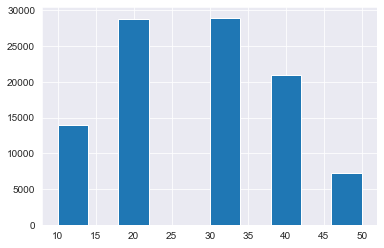

In [28]:
plt.hist(age_bins)

In [29]:
cleaned_df['Age'] = age_bins
cleaned_df['Age']

0        20
1        20
2        20
3        20
4        20
         ..
99995    20
99996    20
99997    20
99998    20
99999    20
Name: Age, Length: 100000, dtype: category
Categories (5, int64): [10 < 20 < 30 < 40 < 50]

## Transformation

In [30]:
cleaned_df['Monthly_Inhand_Salary'] = np.log(cleaned_df['Monthly_Inhand_Salary'])
cleaned_df['Amount_invested_monthly'] = np.sqrt(cleaned_df['Amount_invested_monthly'])
cleaned_df['Outstanding_Debt'] = np.sqrt(cleaned_df['Outstanding_Debt'])
cleaned_df['Delay_from_due_date'] = np.sqrt(cleaned_df['Delay_from_due_date'])

#### Label Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
# occupation 먼저 진행
cols = ['Occupation', 'Payment_of_Min_Amount']

for col in cols:
    le = LabelEncoder()
    cleaned_df[col] = le.fit_transform(cleaned_df[col])
    if col == cols[0]:
        occupation_list = le.classes_
    else:
        pmt_list = le.classes_
print(occupation_list)
print(pmt_list)

['Accountant' 'Architect' 'Developer' 'Doctor' 'Engineer' 'Entrepreneur'
 'Journalist' 'Lawyer' 'Manager' 'Mechanic' 'Media_Manager' 'Musician'
 'Scientist' 'Teacher' 'Writer']
['NM' 'No' 'Yes']


In [33]:
cleaned_df['Occupation']

0        12
1        12
2        12
3        12
4        12
         ..
99995     9
99996     9
99997     9
99998     9
99999     9
Name: Occupation, Length: 100000, dtype: int64

In [34]:
cleaned_df['Credit_Mix'].value_counts()

Standard    45848
Good        30384
Bad         23768
Name: Credit_Mix, dtype: int64

In [35]:
credit_mix_dict = {'Bad': 0, 'Standard': 1, 'Good': 2 }

In [36]:
cleaned_df['Credit_Mix'] = cleaned_df['Credit_Mix'].map(credit_mix_dict)
cleaned_df['Credit_Mix']

0        2
1        2
2        2
3        2
4        2
        ..
99995    2
99996    2
99997    2
99998    2
99999    2
Name: Credit_Mix, Length: 100000, dtype: int64

In [37]:
# payment behaviour 변화가 있었는 지 확인 필요
# dictionary 정의

pb2idx = {
    'Low_spent_Small_value_payments':0,
    'Low_spent_Medium_value_payments'  :1,
    'Low_spent_Large_value_payments' :2,
    'High_spent_Small_value_payments' :3,
    'High_spent_Medium_value_payments' :4,
    'High_spent_Large_value_payments'  :5
}

idx2pb = {
    number: string for string, number in pb2idx.items()
}

print(pb2idx)
print(idx2pb)

{'Low_spent_Small_value_payments': 0, 'Low_spent_Medium_value_payments': 1, 'Low_spent_Large_value_payments': 2, 'High_spent_Small_value_payments': 3, 'High_spent_Medium_value_payments': 4, 'High_spent_Large_value_payments': 5}
{0: 'Low_spent_Small_value_payments', 1: 'Low_spent_Medium_value_payments', 2: 'Low_spent_Large_value_payments', 3: 'High_spent_Small_value_payments', 4: 'High_spent_Medium_value_payments', 5: 'High_spent_Large_value_payments'}


In [38]:
cleaned_df['Payment_Behaviour'] = cleaned_df['Payment_Behaviour'].map(pb2idx)

In [39]:
cleaned_df['Payment_Behaviour']

0        3
1        2
2        1
3        0
4        4
        ..
99995    5
99996    4
99997    5
99998    2
99999    4
Name: Payment_Behaviour, Length: 100000, dtype: int64

#### 컬럼 삭제

In [40]:
data = cleaned_df.drop(['ID', 'Annual_Income', 'Type_of_Loan'], axis=1)
data

,Customer_ID,Month,Age,Occupation,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit-BuilderLoan,DebtConsolidationLoan,HomeEquityLoan,MortgageLoan,NoData,NotSpecified,PaydayLoan,PersonalLoan,StudentLoan,Credit_Score
0,3392,1,20,12,7.509249,3.0,4.0,3.0,4.0,1.732051,...,1,0,1,0,0,0,0,1,0,2
1,3392,2,20,12,7.509249,3.0,4.0,3.0,4.0,1.732051,...,1,0,1,0,0,0,0,1,0,2
2,3392,3,20,12,7.509249,3.0,4.0,3.0,4.0,1.732051,...,1,0,1,0,0,0,0,1,0,2
3,3392,4,20,12,7.509249,3.0,4.0,3.0,4.0,2.236068,...,1,0,1,0,0,0,0,1,0,2
4,3392,5,20,12,7.509249,3.0,4.0,3.0,4.0,2.449490,...,1,0,1,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,20,9,8.119522,4.0,6.0,7.0,2.0,4.795832,...,0,0,0,0,0,0,0,0,1,0
99996,37932,5,20,9,8.119522,4.0,6.0,7.0,2.0,4.242641,...,0,0,0,0,0,0,0,0,1,0
99997,37932,6,20,9,8.119522,4.0,6.0,7.0,2.0,5.196152,...,0,0,0,0,0,0,0,0,1,0
99998,37932,7,20,9,8.119522,4.0,6.0,7.0,2.0,4.472136,...,0,0,0,0,0,0,0,0,1,1


#### 데이터 타입 변경

In [41]:
for idx, dtype in enumerate(data.dtypes[:-1]):   # target 제외 전 데이터 타입 스캔
    if dtype != 'float':
        # print(idx)
        # display(data.iloc[:, idx])
        data.iloc[:, idx] = data.iloc[:, idx].astype(np.float64)

/var/folders/rm/1g600byx25b_ht2r9ty6b4_00000gn/T/ipykernel_25802/713719106.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, idx] = data.iloc[:, idx].astype(np.float64)


In [42]:
data.dtypes

Customer_ID                 float64
Month                       float64
Age                         float64
Occupation                  float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                  float64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount       float64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour           float64
Monthly_Balance             float64
AutoLoan                    float64
Credit-BuilderLoan          float64
DebtConsolidationLoan       float64
HomeEquityLoan              float64
MortgageLoan                float64
NoData                      

In [43]:
income_cols = ['Annual_Income', 'Monthly_Inhand_Salary', 'Monthly_Balance']  # 소득 및 가용 가능 금액
inv_cols = ['Amount_invested_monthly'] # 투자 지출
debt_cols = ['Delay_from_due_date', 'Num_of_Delayed_Payment', 'Outstanding_Debt',
             'Total_EMI_per_month'] # 부채 관련
credit_cols = ['Num_Bank_Accounts', 'Num_Credit_Card', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
               'Credit_Mix', 'Credit_Utilization_Ratio'] #
loan_cols = ['Num_of_Loan']

In [44]:
total_cols = income_cols + inv_cols + debt_cols + credit_cols + loan_cols
print(total_cols)
total_len = len(income_cols + inv_cols + debt_cols + credit_cols + loan_cols)
total_len

['Annual_Income', 'Monthly_Inhand_Salary', 'Monthly_Balance', 'Amount_invested_monthly', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Total_EMI_per_month', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Credit_Utilization_Ratio', 'Num_of_Loan']


15

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
# occupation 먼저 진행
cols = ['Occupation', 'Payment_of_Min_Amount']

for col in cols:
    le = LabelEncoder()
    cleaned_df[col] = le.fit_transform(cleaned_df[col])
    if col == cols[0]:
        occupation_list = le.classes_
    else:
        pmt_list = le.classes_
print(occupation_list)
print(pmt_list)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[0 1 2]


In [47]:
cleaned_df['Occupation']

0        12
1        12
2        12
3        12
4        12
         ..
99995     9
99996     9
99997     9
99998     9
99999     9
Name: Occupation, Length: 100000, dtype: int64

In [48]:
def int2float(data):
    float_data = data.copy()
    for idx, col in enumerate(data.dtypes.index):
        if train_df.dtypes.values[idx] == int:
            float_data[col] = data[col].astype(np.float64)
        # print(idx)
        # print(col)

    return float_data

In [49]:
cleaned_df.drop(['Annual_Income', 'Type_of_Loan'], axis=1, inplace=True)

## 3. Train Test 분할

In [50]:
def data_split(data):

    train = data[data['Month'] <= 6]
    test = data[data['Month'] > 6]

    print('train_df shape: ', train.shape)
    print('test_df shape: ', test.shape)

    return train, test

In [51]:
train_df, test_df = data_split(cleaned_df)

train_df shape:  (75000, 34)
test_df shape:  (25000, 34)


In [52]:
int2float(train_df)

,ID,Customer_ID,Month,Age,Occupation,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit-BuilderLoan,DebtConsolidationLoan,HomeEquityLoan,MortgageLoan,NoData,NotSpecified,PaydayLoan,PersonalLoan,StudentLoan,Credit_Score
0,5634.0,3392.0,1.0,20,12.0,7.509249,3.0,4.0,3.0,4.0,...,1,0,1,0,0,0,0,1,0,2.0
1,5635.0,3392.0,2.0,20,12.0,7.509249,3.0,4.0,3.0,4.0,...,1,0,1,0,0,0,0,1,0,2.0
2,5636.0,3392.0,3.0,20,12.0,7.509249,3.0,4.0,3.0,4.0,...,1,0,1,0,0,0,0,1,0,2.0
3,5637.0,3392.0,4.0,20,12.0,7.509249,3.0,4.0,3.0,4.0,...,1,0,1,0,0,0,0,1,0,2.0
4,5638.0,3392.0,5.0,20,12.0,7.509249,3.0,4.0,3.0,4.0,...,1,0,1,0,0,0,0,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,155623.0,37932.0,2.0,20,9.0,8.119522,4.0,6.0,7.0,2.0,...,0,0,0,0,0,0,0,0,1,1.0
99994,155624.0,37932.0,3.0,20,9.0,8.119522,4.0,6.0,7.0,2.0,...,0,0,0,0,0,0,0,0,1,0.0
99995,155625.0,37932.0,4.0,20,9.0,8.119522,4.0,6.0,7.0,2.0,...,0,0,0,0,0,0,0,0,1,0.0
99996,155626.0,37932.0,5.0,20,9.0,8.119522,4.0,6.0,7.0,2.0,...,0,0,0,0,0,0,0,0,1,0.0


In [53]:
test_df

,ID,Customer_ID,Month,Age,Occupation,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit-BuilderLoan,DebtConsolidationLoan,HomeEquityLoan,MortgageLoan,NoData,NotSpecified,PaydayLoan,PersonalLoan,StudentLoan,Credit_Score
6,5640,3392,7,20,12,7.509249,3.0,4.0,3.0,4.0,...,1,0,1,0,0,0,0,1,0,2
7,5641,3392,8,20,12,7.509249,3.0,4.0,3.0,4.0,...,1,0,1,0,0,0,0,1,0,1
14,5652,8625,7,20,13,8.018950,2.0,4.0,6.0,1.0,...,1,0,0,0,0,0,0,0,0,2
15,5653,8625,8,20,13,8.018950,2.0,4.0,6.0,1.0,...,1,0,0,0,0,0,0,0,0,2
22,5664,11708,7,30,4,9.408143,1.0,5.0,8.0,3.0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99983,155605,44897,8,40,14,8.038192,1.0,4.0,5.0,3.0,...,0,0,1,1,0,0,0,0,1,2
99990,155616,34304,7,20,1,7.565227,10.0,8.0,29.0,5.0,...,0,0,0,1,0,0,0,1,2,1
99991,155617,34304,8,20,1,7.565227,10.0,8.0,29.0,5.0,...,0,0,0,1,0,0,0,1,2,1
99998,155628,37932,7,20,9,8.119522,4.0,6.0,7.0,2.0,...,0,0,0,0,0,0,0,0,1,1


In [54]:
X_train = train_df.iloc[:, 1: -1].values
y_train = train_df.iloc[:, -1].values

X_test = test_df.iloc[:, 1:-1].values
y_test = test_df.iloc[:, -1].values

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)


(75000, 32)
(75000,)
(25000, 32)
(25000,)


In [55]:
import tensorflow as tf
from time import time
from datetime import timedelta
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [56]:
# loss와 accuracy 시각화를 위한 함수 정의
def plot_loss(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], 'b-', label='loss')
    plt.plot(history.history['val_loss'], 'g--', label='val_loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Val Loss')
    plt.legend()
    plt.show()

def plot_acc(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['acc'], 'b-', label='acc')
    plt.plot(history.history['val_acc'], 'g--', label='val_acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Val Accuracy')
    plt.legend()
    plt.show()

In [57]:
# 결과 재활용을 위한 시드 설정 함수 정의
import random
def set_seed(seed: int = 42) -> None:
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.experimental.numpy.random.seed(seed)
    # When running on the CuDNN backend, two further options must be set
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    # Set a fixed value for the hash seed
    os.environ["PYTHONHASHSEED"] = str(seed)
    print(f"Random seed set as {seed}")

In [58]:
# 분류모델 결과 평가를 위한 혼동행렬 리포트 & 시각화 함수 정의
def clf_report_plot(y_true, X_test, model):

    result = model.predict(X_test)

    y_pred = []
    for pred in result:
        y_pred.append(np.argmax(pred))

    print(classification_report(y_true, y_pred, digits=4))

    # plt.rc('font', family='NanumGothicOTF') # For MacOS
    plt.rc('font', family='NanumGothic') # For Windows

    ax = plt.subplot()
    ax.figure.set_size_inches(10, 10)
    cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', ax=ax)

    ax.set_title('Confusion Matrix',fontsize=20, y=1.05)
    ax.set_xlabel('Predicted Labels', fontsize=15)
    ax.set_ylabel('True Labels', fontsize=15)

    ax.xaxis.set_ticklabels(['Poor', 'Standard', 'Good'])
    ax.yaxis.set_ticklabels(['Poor', 'Standard', 'Good'])
    plt.show()

In [59]:
from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras.layers import Embedding, Dense, LSTM, RNN, Flatten, SimpleRNN
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Input

from tensorflow.keras.initializers import GlorotUniform

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

- conv1D: `[batch_size, time_steps, input_dimension]`
- Current shape: `[batch_size, features]`
-

In [60]:
sample_size = X_train.shape[0]
time_steps = X_train.shape[1]
input_dim = 1 # each feature is represented by 1 number


In [61]:
X_train_reshape = X_train.reshape(sample_size, time_steps, input_dim)

print("After reshape train data set shape:\n", X_train_reshape.shape)
print("1 Sample shape:\n",X_train_reshape[0].shape)
print("An example sample:\n", X_train_reshape[0])

After reshape train data set shape:
 (75000, 32, 1)
1 Sample shape:
 (32, 1)
An example sample:
 [[3.39200000e+03]
 [1.00000000e+00]
 [2.00000000e+01]
 [1.20000000e+01]
 [7.50924942e+00]
 [3.00000000e+00]
 [4.00000000e+00]
 [3.00000000e+00]
 [4.00000000e+00]
 [1.73205081e+00]
 [7.00000000e+00]
 [1.12700000e+01]
 [4.00000000e+00]
 [2.00000000e+00]
 [2.84601476e+01]
 [2.68226196e+01]
 [2.65000000e+02]
 [1.00000000e+00]
 [4.95749492e+01]
 [4.63307460e+00]
 [3.00000000e+00]
 [3.12494089e+02]
 [1.00000000e+00]
 [1.00000000e+00]
 [0.00000000e+00]
 [1.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [1.00000000e+00]
 [0.00000000e+00]]


In [62]:
X_train

array([[3.3920e+03, 1.0000e+00, 2.0000e+01, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [3.3920e+03, 2.0000e+00, 2.0000e+01, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [3.3920e+03, 3.0000e+00, 2.0000e+01, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [3.7932e+04, 4.0000e+00, 2.0000e+01, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [3.7932e+04, 5.0000e+00, 2.0000e+01, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [3.7932e+04, 6.0000e+00, 2.0000e+01, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [63]:
X_test_reshape = X_test.reshape(X_test.shape[0], X_test.shape[1], input_dim)

shape 참고: https://www.kaggle.com/code/kmkarakaya/1-dimensional-convolution-conv1d-for-regression

In [64]:
num_classes = 3

# n_timesteps = train_X_reshaped.shape[1] # 31
# n_features  = train_X_reshaped.shape[2] # 1

In [65]:
set_seed(42)
model = Sequential()
model.add(Input(shape=(time_steps, input_dim)))
model.add(Conv1D(128, kernel_size=2, activation='relu'))
# model.add(MaxPooling1D(pool_size=3, strides=1))
model.add(Dropout(0.3))
model.add(Conv1D(128, kernel_size=4, activation='relu'))

model.add(Dropout(0.3))
model.add(Conv1D(128, kernel_size=8, activation='relu'))
# model.add(Conv1D(64, kernel_size=4, strides=4, activation='relu'))
model.add(MaxPooling1D())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))


model.add(Dense(num_classes, activation='softmax'))

Random seed set as 42
Metal device set to: Apple M1 Pro


2022-11-14 22:32:28.935878: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-14 22:32:28.936023: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 31, 128)           384       
                                                                 
 dropout (Dropout)           (None, 31, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 128)           65664     
                                                                 
 dropout_1 (Dropout)         (None, 28, 128)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 21, 128)           131200    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 128)          0         
 )                                                               
                                                        

In [67]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('cnn_best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [68]:
print('Algorithm starts learning.....')
start_time = time()

history = model.fit(X_train_reshape, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[es, mc] )

print("Learning Durations: ", timedelta(seconds=(time() - start_time)))

Algorithm starts learning.....
Epoch 1/50


2022-11-14 22:32:29.129724: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-14 22:32:29.381263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - ETA: 0s - loss: 1.4397 - acc: 0.5307

2022-11-14 22:32:42.297262: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_acc improved from -inf to 0.54167, saving model to cnn_best_model.h5
938/938 [==============================] - 15s 15ms/step - loss: 1.4397 - acc: 0.5307 - val_loss: 0.9976 - val_acc: 0.5417
Epoch 2/50
937/938 [============================>.] - ETA: 0s - loss: 0.9976 - acc: 0.5349
Epoch 2: val_acc did not improve from 0.54167
938/938 [==============================] - 14s 15ms/step - loss: 0.9976 - acc: 0.5348 - val_loss: 0.9971 - val_acc: 0.5417
Epoch 3/50
935/938 [============================>.] - ETA: 0s - loss: 0.9971 - acc: 0.5348
Epoch 3: val_acc did not improve from 0.54167
938/938 [==============================] - 14s 15ms/step - loss: 0.9972 - acc: 0.5348 - val_loss: 0.9972 - val_acc: 0.5417
Epoch 4/50
938/938 [==============================] - ETA: 0s - loss: 0.9972 - acc: 0.5348
Epoch 4: val_acc did not improve from 0.54167
938/938 [==============================] - 13s 14ms/step - loss: 0.9972 - acc: 0.5348 - val_loss: 0.9970 - val_acc: 0.5417
Epoch 5/50
935

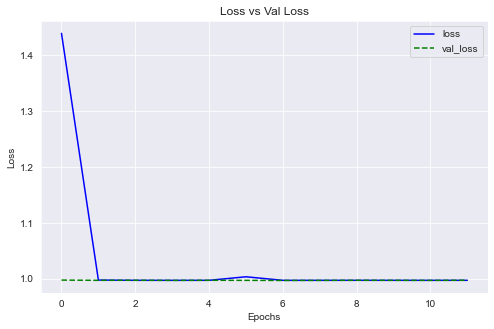

In [69]:
plot_loss(history)

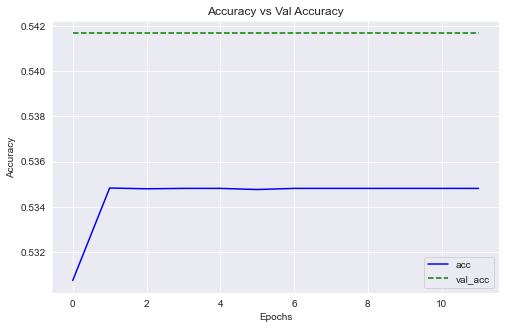

In [70]:
plot_acc(history)

In [71]:
best_model = load_model('./cnn_best_model.h5')
print('Test Accuracy: {}'.format(best_model.evaluate(test_X_reshaped, test_y)[1]))

NameError: name 'test_X_reshaped' is not defined

In [ ]:
clf_report_plot(test_y, test_X_reshaped, best_model)